# Tarea Académica 2

## Importamos los paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
#nltk.download("all") #solo es necesario 'punkt' (RECORDAR)
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Cargamos el data set

In [3]:
SMS = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
SMS.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
SMS = SMS.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
SMS.columns = ["Tipo", "Mensaje"]
SMS.head()

,Tipo,Mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Analizamos el data set

### Observemos que porcentaje de nuestro data set es SPAM

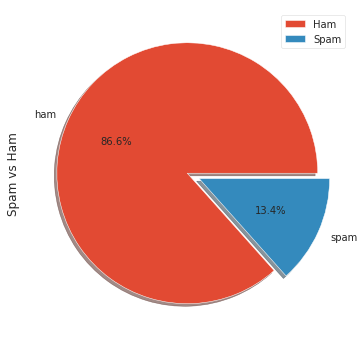

In [5]:
SMS["Tipo"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.savefig('GraficoPie.png', transparent=True)
plt.show()

### Observemos los mensajes que más se repiten

In [6]:
topSMS = SMS.groupby("Mensaje")["Tipo"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topSMS)

,len,amax
Mensaje,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


### Analicemos cada mensaje

In [7]:
spam_messages = SMS[SMS["Tipo"] == "spam"]["Mensaje"]
ham_messages = SMS[SMS["Tipo"] == "ham"]["Mensaje"]

spam_words = []
ham_words = []

def extraerSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extraerHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extraerSpamWords)
ham_messages.apply(extraerHamWords)

0       None
1       None
3       None
4       None
6       None
7       None
10      None
13      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
35      None
36      None
37      None
38      None
        ... 
5538    None
5539    None
5541    None
5542    None
5543    None
5544    None
5545    None
5546    None
5548    None
5549    None
5550    None
5551    None
5552    None
5553    None
5554    None
5555    None
5556    None
5557    None
5558    None
5559    None
5560    None
5561    None
5562    None
5563    None
5564    None
5565    None
5568    None
5569    None
5570    None
5571    None
Name: Mensaje, Length: 4825, dtype: object

In [0]:
from wordcloud import WordCloud

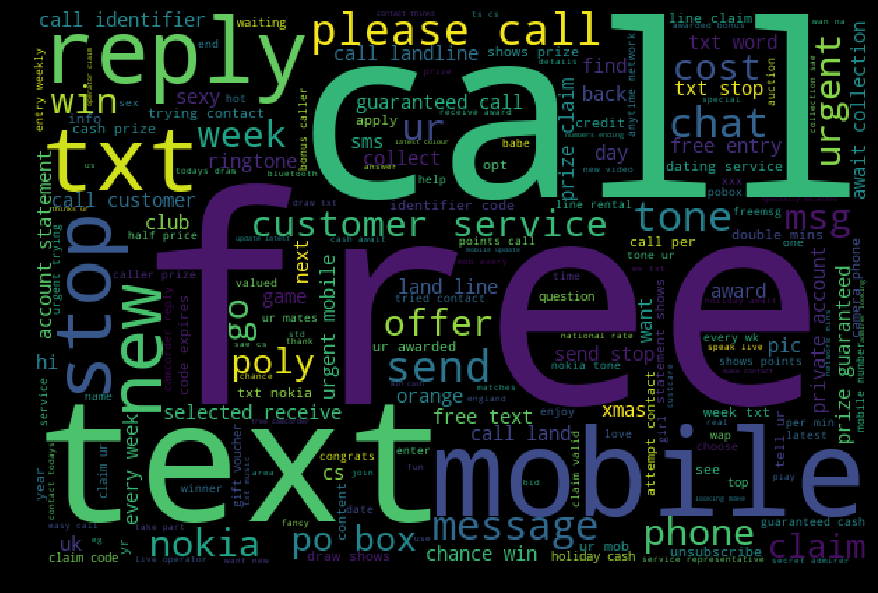

In [9]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure(figsize=(12,10),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('spam_wordcloud.png', transparent=True)
plt.show()

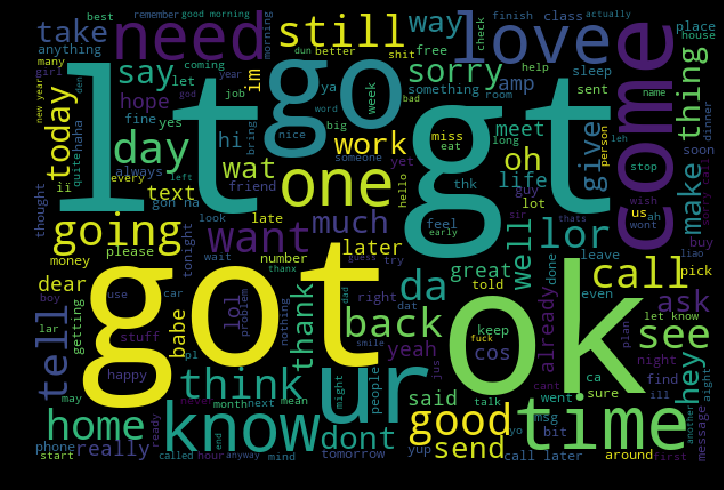

In [11]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('ham_wordcloud.png', transparent=True)
plt.show()

In [0]:
from collections import Counter

In [0]:
list_ham_words = []
for sublist in ham_words:
  list_ham_words.append(sublist)

In [0]:
list_ham_words

['go',
 'jurong',
 'point',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make',
 'v',
 'wet',
 'fin

In [0]:
list_spam_words = []
for sublist in spam_words:
  list_spam_words.append(sublist)

In [0]:
list_spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'txt',
 'send',
 'cost',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'lccltd',
 'pobox',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'message',
 'click',
 'http',
 'england

In [0]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [0]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['Palabra', 'Cantidad'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['Palabra', 'Cantidad'])

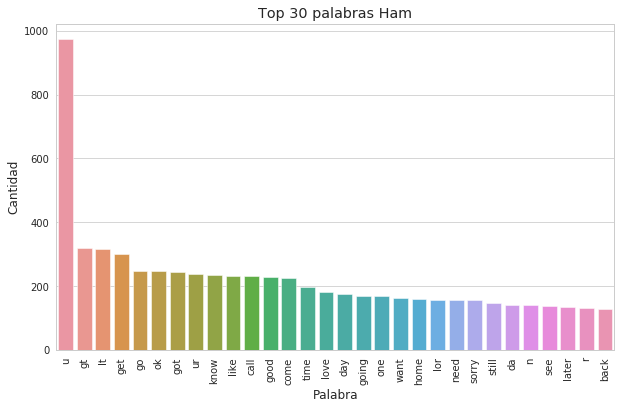

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Palabra', y='Cantidad', 
            data=df_hamwords_top30_nltk, ax=ax)
plt.title("Top 30 palabras Ham")
plt.xticks(rotation='vertical')
plt.savefig('Top30Ham.png', transparent=True)

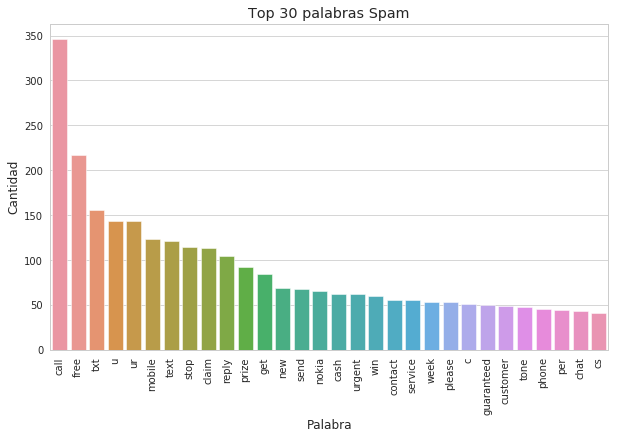

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Palabra', y='Cantidad', 
            data=df_spamwords_top30_nltk, ax=ax)
plt.title("Top 30 palabras Spam")
plt.xticks(rotation='vertical')
plt.savefig('Top30Spam.png', transparent=True)

In [19]:
SMS["Longitud"] = SMS["Mensaje"].apply(len)
SMS["Longitud"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Longitud, dtype: float64

In [20]:
SMS.head()

,Tipo,Mensaje,Longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


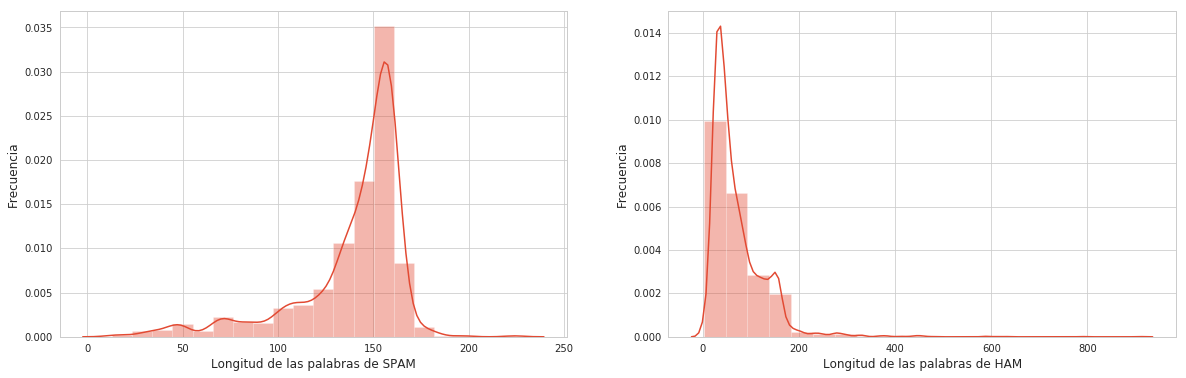

In [21]:


f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(SMS[SMS["Tipo"] == "spam"]["Longitud"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Longitud de las palabras de SPAM")
ax[0].set_ylabel("Frecuencia")

sns.distplot(SMS[SMS["Tipo"] == "ham"]["Longitud"], bins = 20, ax = ax[1])
ax[1].set_xlabel("Longitud de las palabras de HAM")
ax[1].set_ylabel("Frecuencia")

plt.savefig('HistogramaLongitud.png', transparent=True)
plt.show()

## Experimentacíon

In [22]:
SMS.head()

,Tipo,Mensaje,Longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Eliminamos los signos de puntuación de los mensajes

In [0]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

SMS["Mensaje"] = SMS["Mensaje"].apply(cleanText) 

In [44]:
SMS.head(n = 10)

,Tipo,Mensaje,Longitud
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155
3,ham,u dun say ear hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea å£9...,158
9,spam,mobil 11 month u r entitl updat latest colour ...,154


### Vectorizamos los mensajes

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(SMS["Mensaje"])
print(features.shape)

(5572, 7880)


In [47]:
vec

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='latin-1',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

### Convertimos los tipos en booleanos

In [0]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0

In [0]:
SMS["Tipo"] = SMS["Tipo"].apply(encodeCategory)

In [50]:
SMS.head()

,Tipo,Mensaje,Longitud
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say ear hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61


### Creamos los modelos

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [0]:
clfs = {'KNC' : knc, 'DTC': dtc, 'LRC': lrc, 'RFC': rfc}

In [0]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [0]:
def predict_labels(clf, features):
    return (clf.predict(features))

### Entreanamos los modelos

#### Separamos los datos

##### De acuerdo al mensaje

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, SMS["Tipo"], stratify = SMS["Tipo"], test_size = 0.2)

In [0]:
def entrenar_y_evaluar_modelos(pred_scores):
  for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, [accuracy_score(y_test,pred)]))

In [0]:
pred_scores1 = []
entrenar_y_evaluar_modelos(pred_scores1)

In [64]:
cuadroScores1 = pd.DataFrame.from_items(pred_scores1,orient='index', columns=['Score'])
cuadroScores1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
KNC,0.921076
DTC,0.957848
LRC,0.959641
RFC,0.974888


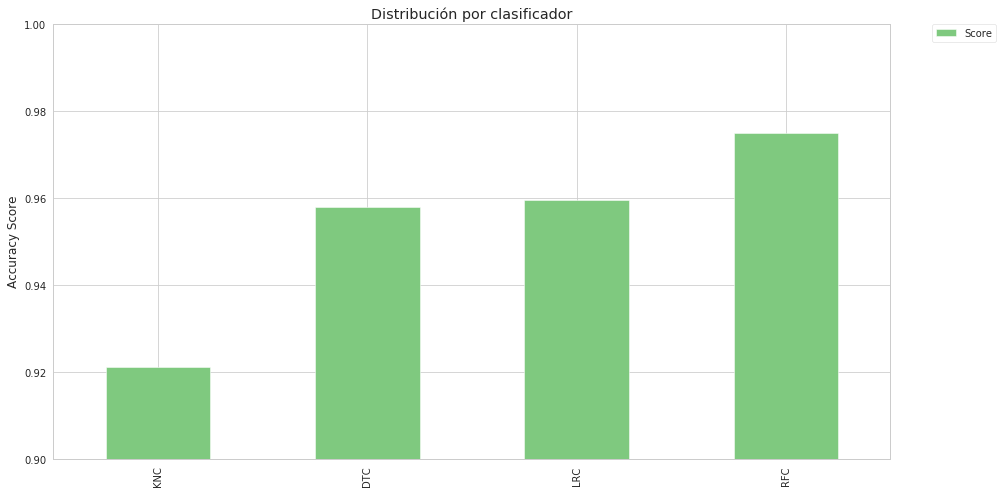

In [85]:
cuadroScores1.plot(kind='bar', ylim=(0.9,1.0), figsize=(15,8),align='center', colormap="Accent")
plt.ylabel('Accuracy Score')
plt.title('Distribución por clasificador')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('barChartScore1.png', transparent=True)

##### De acuerdo a la longitud del mensaje

In [78]:
lf = SMS['Longitud'].as_matrix()
nueva_caracteristica = np.hstack((features.todense(),lf[:, None]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(nueva_caracteristica, SMS["Tipo"], stratify = SMS["Tipo"], test_size = 0.2)

In [0]:
pred_scores2 = []
entrenar_y_evaluar_modelos(pred_scores2)

In [81]:
cuadroScores2 = pd.DataFrame.from_items(pred_scores2,orient='index', columns=['Score 2'])
cuadroScores2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score 2
KNC,0.902242
DTC,0.965022
LRC,0.957848
RFC,0.975785


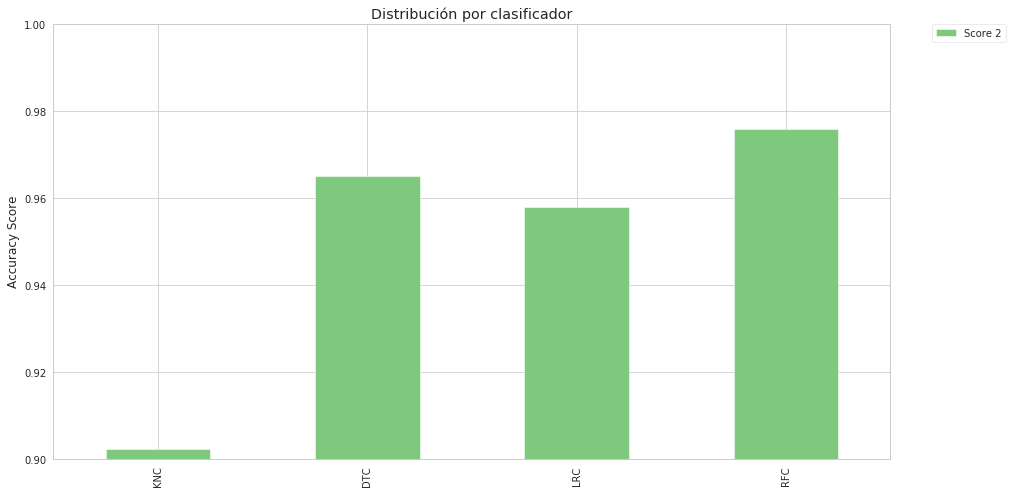

In [86]:
cuadroScores2.plot(kind='bar', ylim=(0.9,1.0), figsize=(15,8),align='center', colormap="Accent")
plt.ylabel('Accuracy Score')
plt.title('Distribución por clasificador')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('barChartScore2.png', transparent=True)

### Comparamos resultados

In [83]:
tabla = pd.concat([cuadroScores1,cuadroScores2], axis=1)
tabla

,Score,Score 2
KNC,0.921076,0.902242
DTC,0.957848,0.965022
LRC,0.959641,0.957848
RFC,0.974888,0.975785


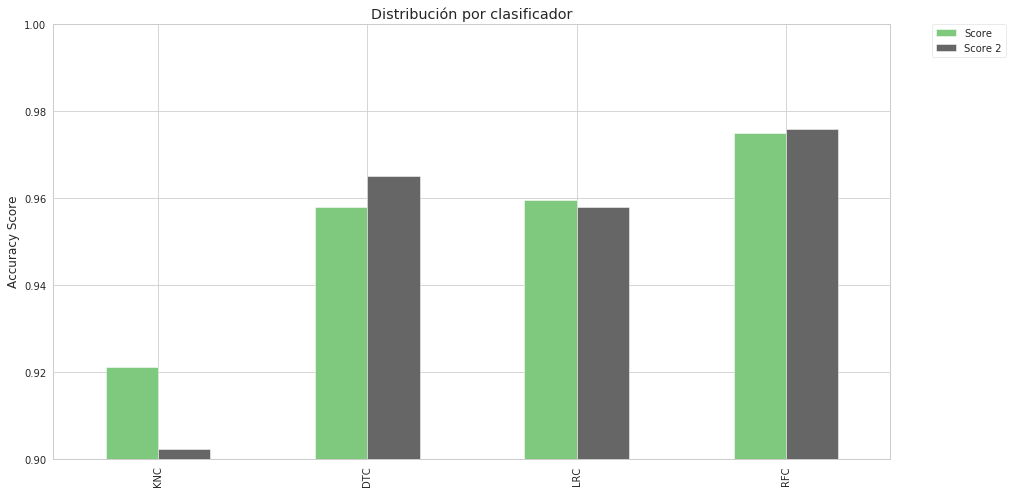

In [87]:
tabla.plot(kind='bar', ylim=(0.9,1.0), figsize=(15,8),align='center', colormap="Accent")
plt.ylabel('Accuracy Score')
plt.title('Distribución por clasificador')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('barChartScoreComparison.png', transparent=True)